In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from collections import Counter
import ipaddress
import re
from urllib.parse import parse_qs, urlparse

# Set style for better visualizations
plt.style.use('seaborn-v0_8-dark')
sns.set_palette("husl")

# Read the CSV file
df = pd.read_csv('data/logs.csv', header=None, 
                 names=['date', 'time', 'ip', 'method', 'path', 'protocol', 
                        'status', 'referrer', 'user_agent', 'payload'])

# Combine date and time into a datetime column
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], 
                               format='%d/%b/%Y %H:%M:%S')

# Basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nSample of the data:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14945 entries, 0 to 14944
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        14945 non-null  object        
 1   time        14945 non-null  object        
 2   ip          14945 non-null  object        
 3   method      14945 non-null  object        
 4   path        14945 non-null  object        
 5   protocol    14945 non-null  object        
 6   status      14945 non-null  int64         
 7   referrer    11677 non-null  object        
 8   user_agent  14945 non-null  object        
 9   payload     5128 non-null   object        
 10  timestamp   14945 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.3+ MB
None

Sample of the data:
          date      time             ip method        path  protocol  status  \
0  06/Jan/2025  06:02:58  82.81.156.133    GET           /  HTTP/1.1     200  

In [9]:
transakcja_logs = df[df['path'].str.startswith('/transakcja')]
print(transakcja_logs)

              date      time              ip method  \
20     06/Jan/2025  06:17:50    81.77.116.92    GET   
21     06/Jan/2025  06:19:01    81.77.116.92   POST   
22     06/Jan/2025  06:19:01    81.77.116.92    GET   
23     06/Jan/2025  06:19:07    81.77.116.92   POST   
31     06/Jan/2025  06:31:26  185.139.183.67    GET   
...            ...       ...             ...    ...   
14913  16/Jan/2025  16:17:11   82.83.138.135   POST   
14931  16/Jan/2025  16:26:21   82.124.149.25    GET   
14932  16/Jan/2025  16:28:00   82.124.149.25   POST   
14933  16/Jan/2025  16:28:00   82.124.149.25    GET   
14934  16/Jan/2025  16:28:38   82.124.149.25   POST   

                                                    path  protocol  status  \
20                                           /transakcja  HTTP/1.1     200   
21                                           /transakcja  HTTP/1.1     200   
22     /transakcja,e9da7ade108a1d6d8ac69444a18ef129f7...  HTTP/1.1     200   
23     /transakcja,e9da7ade

/var/folders/v2/1kxhdlt556vd788lhq7q84xm0000gn/T/ipykernel_81714/4263959791.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp').resample('1H')['method'].count().plot()


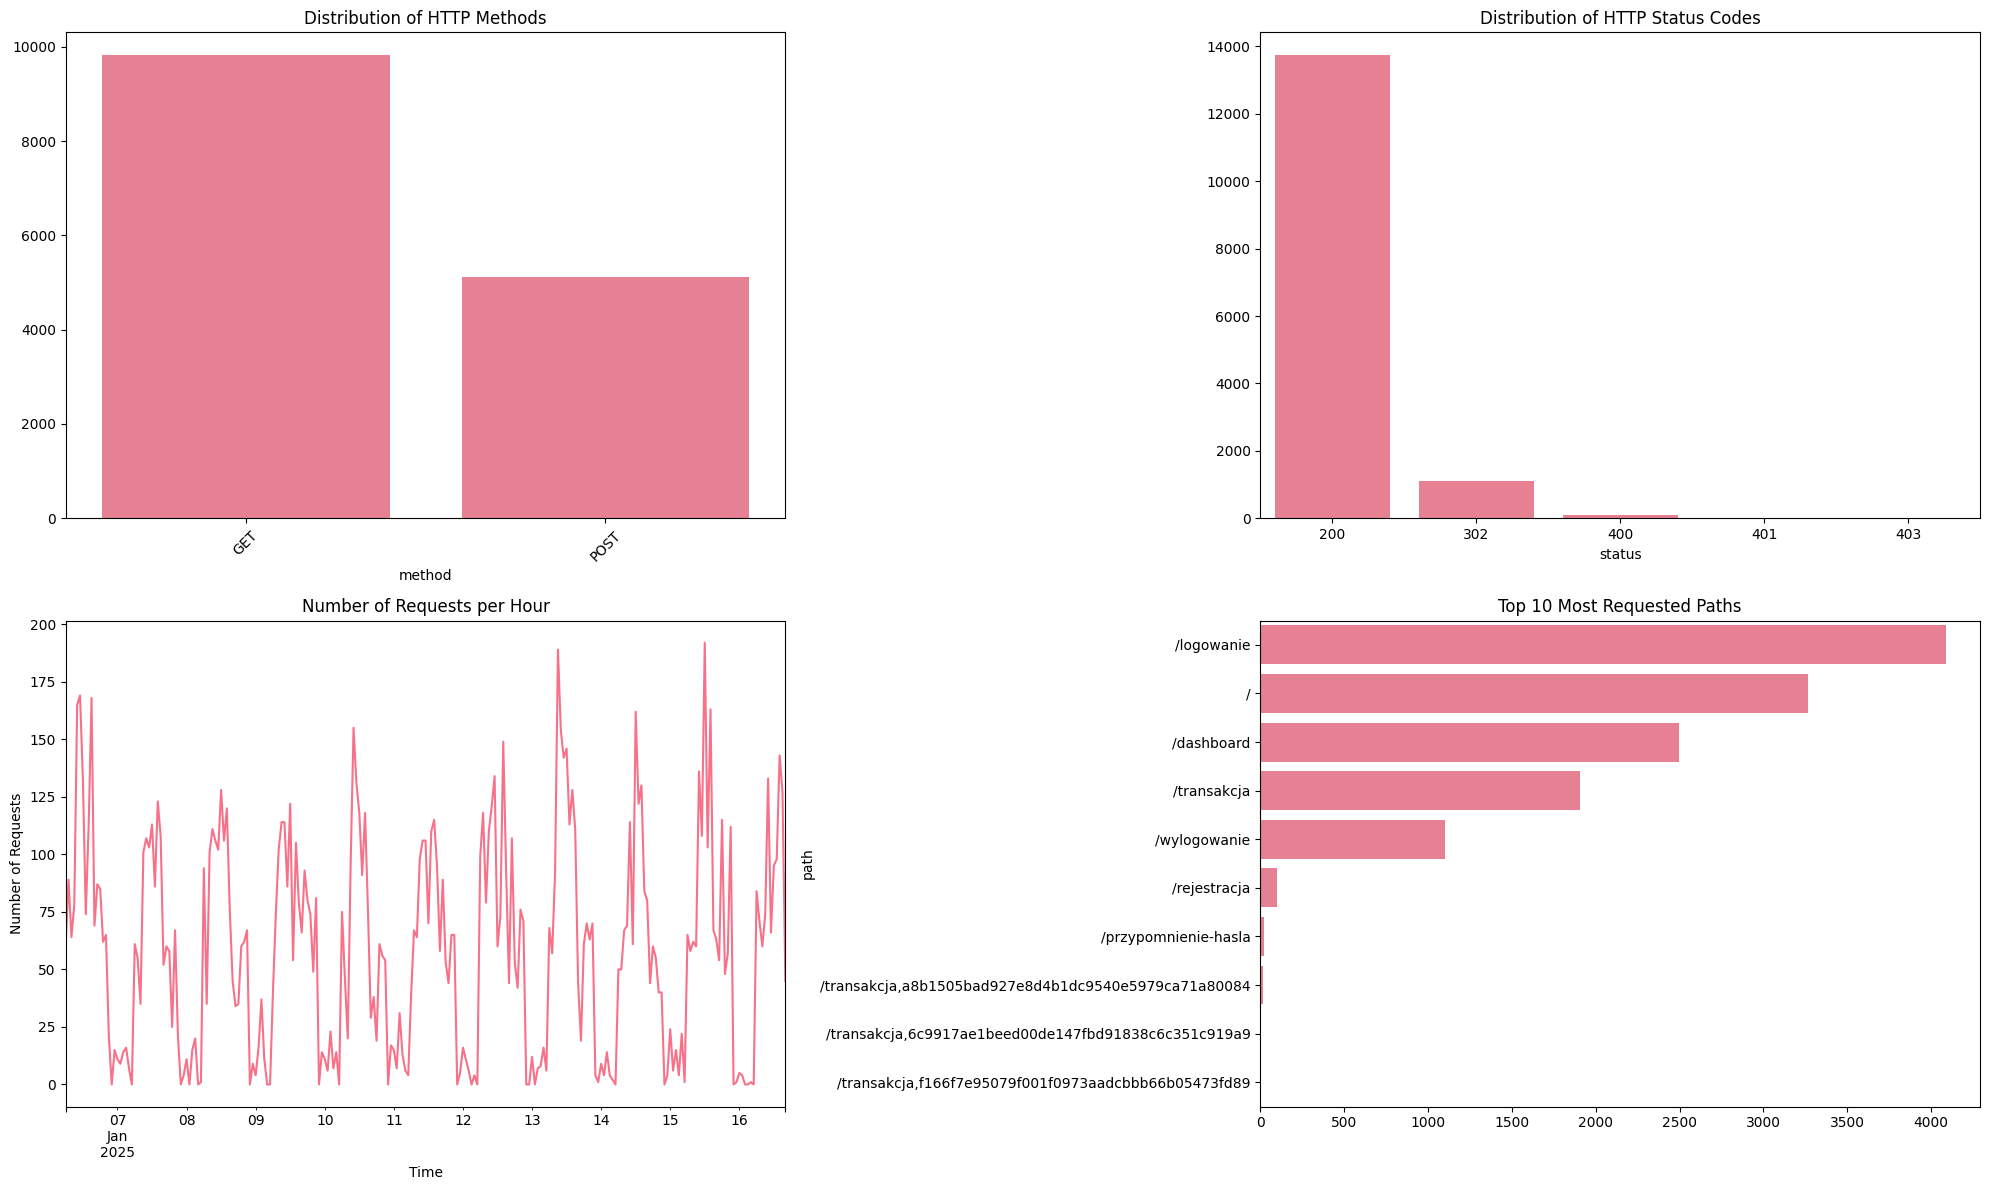


Top 10 IP addresses by number of requests:
ip
185.152.64.228    22
83.9.37.128       18
81.76.152.106     15
81.244.34.85      12
81.109.23.243     11
82.138.15.187     11
185.85.192.179    11
82.224.11.152     11
82.234.206.15     11
81.212.45.173     11
Name: count, dtype: int64

Top 10 paths with their request counts:
path
/logowanie                                              4087
/                                                       3268
/dashboard                                              2498
/transakcja                                             1906
/wylogowanie                                            1100
/rejestracja                                             100
/przypomnienie-hasla                                      24
/transakcja,a8b1505bad927e8d4b1dc9540e5979ca71a80084      15
/transakcja,6c9917ae1beed00de147fbd91838c6c351c919a9       2
/transakcja,f166f7e95079f001f0973aadcbbb66b05473fd89       2
Name: count, dtype: int64


In [4]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 12))

# 1. Request Methods Distribution
plt.subplot(2, 2, 1)
method_counts = df['method'].value_counts()
sns.barplot(x=method_counts.index, y=method_counts.values)
plt.title('Distribution of HTTP Methods')
plt.xticks(rotation=45)

# 2. Status Codes Distribution
plt.subplot(2, 2, 2)
status_counts = df['status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of HTTP Status Codes')

# 3. Requests Over Time
plt.subplot(2, 2, 3)
df.set_index('timestamp').resample('1H')['method'].count().plot()
plt.title('Number of Requests per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)

# 4. Top 10 Most Requested Paths
plt.subplot(2, 2, 4)
path_counts = df['path'].value_counts().head(10)
sns.barplot(x=path_counts.values, y=path_counts.index)
plt.title('Top 10 Most Requested Paths')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTop 10 IP addresses by number of requests:")
print(df['ip'].value_counts().head(10))

print("\nTop 10 paths with their request counts:")
print(df['path'].value_counts().head(10))

/var/folders/v2/1kxhdlt556vd788lhq7q84xm0000gn/T/ipykernel_81714/3302055596.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  login_attempts.set_index('timestamp')['ip'].resample('1H').count().plot()


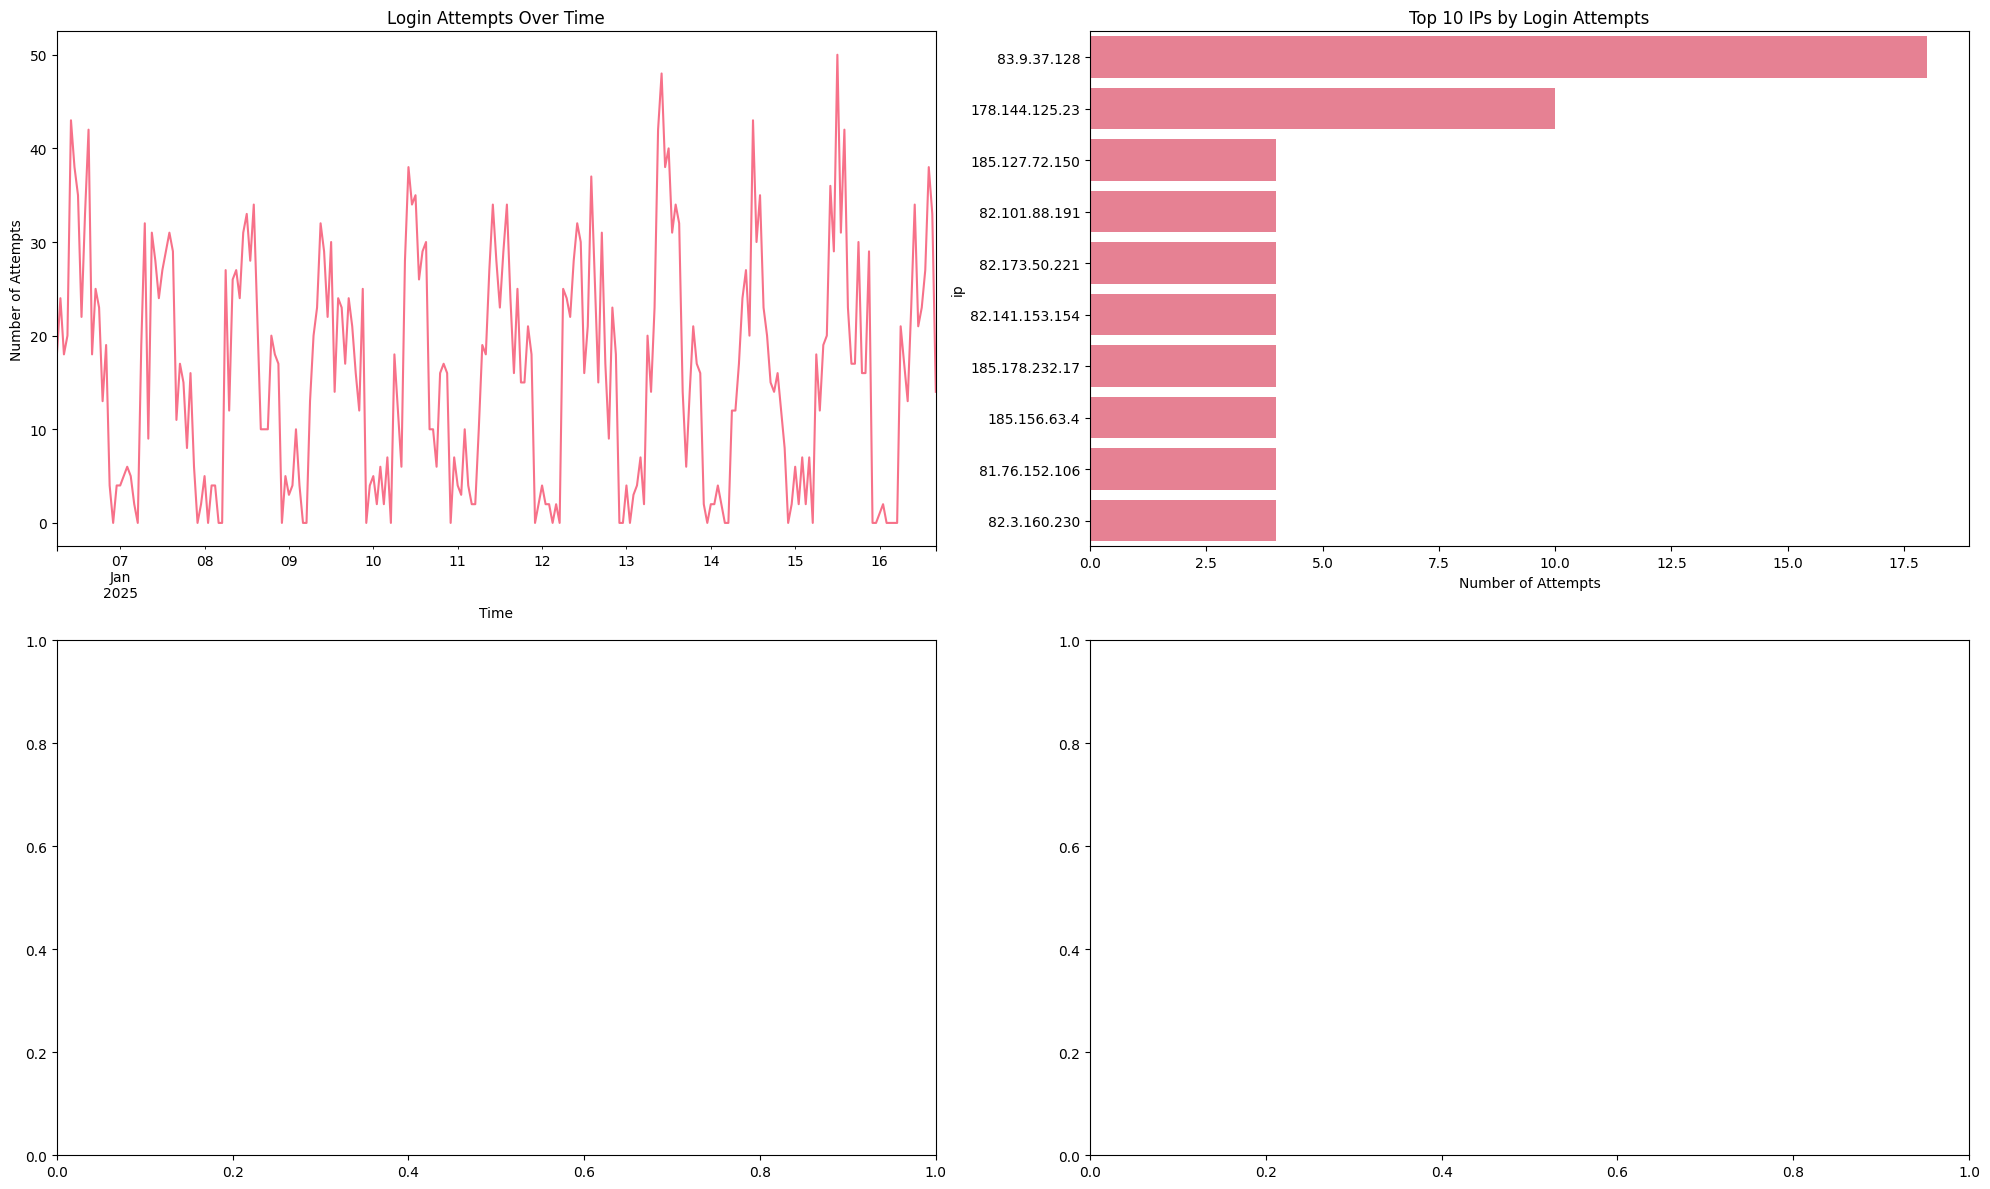


Security Analysis Summary:
Total number of login attempts: 4087
Number of unique IPs making login attempts: 2023
Number of rapid request incidents: 1
Number of suspicious payloads detected: 3
Number of unusual paths accessed: 0

Sequential Login Attempts Analysis:
IP: 178.144.125.23
Total login attempts: 10
Timespan: 0 days 00:00:57
--------------------------------------------------
IP: 83.9.37.128
Total login attempts: 18
Timespan: 0 days 00:01:03
--------------------------------------------------

Path patterns for suspicious IPs:
Series([], Name: count, dtype: int64)


In [7]:
# Function to detect potential suspicious patterns
def analyze_suspicious_patterns(df):
    suspicious_patterns = {
        'rapid_requests': [],
        'login_attempts': [],
        'suspicious_payloads': [],
        'unusual_paths': []
    }
    
    # 1. Detect rapid requests from same IP (more than 10 requests per minute)
    ip_time_groups = df.groupby([df['ip'], 
                                df['timestamp'].dt.floor('min')])['method'].count()
    rapid_requests = ip_time_groups[ip_time_groups > 10]
    
    # 2. Analyze login attempts - specifically looking at failed login patterns
    login_attempts = df[df['path'].str.contains('/logowanie', na=False)]
    failed_logins = login_attempts[
        login_attempts['payload'].str.contains('error|failed|invalid', 
                                             na=False, case=False, regex=True)]
    
    # 3. Look for suspicious payloads - using safe pattern matching
    suspicious_patterns = [
        r'script\W*', r'eval\s*\(', r'exec\s*\(', r'SELECT\s+\w+', 
        r'UNION\s+SELECT', r'DROP\s+TABLE', r'alert\s*\(', 
        r'<[^>]*script'
    ]
    pattern = '|'.join(suspicious_patterns)
    suspicious_payloads = df[
        df['payload'].str.contains(pattern, na=False, case=False, regex=True)]
    
    # 4. Detect unusual paths
    unusual_path_patterns = [
        r'\.\./', r'%00', r'/etc/passwd', r'/wp-admin',
        r'\.php$', r'\.asp$', r'\.exe$', r'\.dll$'
    ]
    pattern = '|'.join(unusual_path_patterns)
    unusual_paths = df[
        (df['path'].str.len() > 100) | 
        (df['path'].str.contains(pattern, na=False, case=False, regex=True))]
    
    # Additional analysis - Looking for sequential failed login attempts
    sequential_login_attempts = []
    for ip in df['ip'].unique():
        ip_logins = login_attempts[login_attempts['ip'] == ip]
        if len(ip_logins) > 5:  # More than 5 login attempts from same IP
            sequential_login_attempts.append({
                'ip': ip,
                'count': len(ip_logins),
                'timespan': ip_logins['timestamp'].max() - ip_logins['timestamp'].min()
            })
    
    return {
        'rapid_requests': rapid_requests,
        'login_attempts': failed_logins,
        'suspicious_payloads': suspicious_payloads,
        'unusual_paths': unusual_paths,
        'sequential_logins': sequential_login_attempts
    }

# Analyze suspicious patterns
suspicious_patterns = analyze_suspicious_patterns(df)

# Create visualization for the analysis
plt.figure(figsize=(20, 12))

# 1. Plot login attempts over time
plt.subplot(2, 2, 1)
login_attempts = df[df['path'] == '/logowanie']
login_attempts.set_index('timestamp')['ip'].resample('1H').count().plot()
plt.title('Login Attempts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Attempts')

# 2. Plot unique IPs making login attempts
plt.subplot(2, 2, 2)
top_login_ips = login_attempts['ip'].value_counts().head(10)
sns.barplot(x=top_login_ips.values, y=top_login_ips.index)
plt.title('Top 10 IPs by Login Attempts')
plt.xlabel('Number of Attempts')

# 3. Plot HTTP methods used in suspicious requests
plt.subplot(2, 2, 3)
suspicious_methods = df[df['ip'].isin(suspicious_patterns['rapid_requests'].index)]['method'].value_counts()
if not suspicious_methods.empty:
    sns.barplot(x=suspicious_methods.index, y=suspicious_methods.values)
    plt.title('HTTP Methods in Suspicious Requests')
    plt.xticks(rotation=45)

# 4. Plot path distribution for suspicious requests
plt.subplot(2, 2, 4)
suspicious_paths = df[df['ip'].isin(suspicious_patterns['rapid_requests'].index)]['path'].value_counts().head(10)
if not suspicious_paths.empty:
    sns.barplot(x=suspicious_paths.values, y=suspicious_paths.index)
    plt.title('Top Paths in Suspicious Requests')

plt.tight_layout()
plt.show()

# Print summary statistics and findings
print("\nSecurity Analysis Summary:")
print(f"Total number of login attempts: {len(login_attempts)}")
print(f"Number of unique IPs making login attempts: {login_attempts['ip'].nunique()}")
print(f"Number of rapid request incidents: {len(suspicious_patterns['rapid_requests'])}")
print(f"Number of suspicious payloads detected: {len(suspicious_patterns['suspicious_payloads'])}")
print(f"Number of unusual paths accessed: {len(suspicious_patterns['unusual_paths'])}")

# Print details of sequential login attempts
print("\nSequential Login Attempts Analysis:")
for attempt in suspicious_patterns['sequential_logins']:
    print(f"IP: {attempt['ip']}")
    print(f"Total login attempts: {attempt['count']}")
    print(f"Timespan: {attempt['timespan']}")
    print("-" * 50)

# Additional analysis of paths accessed by suspicious IPs
suspicious_ips = set(suspicious_patterns['rapid_requests'].index)
if suspicious_ips:
    print("\nPath patterns for suspicious IPs:")
    suspicious_ip_paths = df[df['ip'].isin(suspicious_ips)]['path'].value_counts()
    print(suspicious_ip_paths.head(10))

/var/folders/v2/1kxhdlt556vd788lhq7q84xm0000gn/T/ipykernel_81714/4120503688.py:86: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp').groupby('ip_type').resample('1H').size().unstack().plot()
/var/folders/v2/1kxhdlt556vd788lhq7q84xm0000gn/T/ipykernel_81714/4120503688.py:92: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


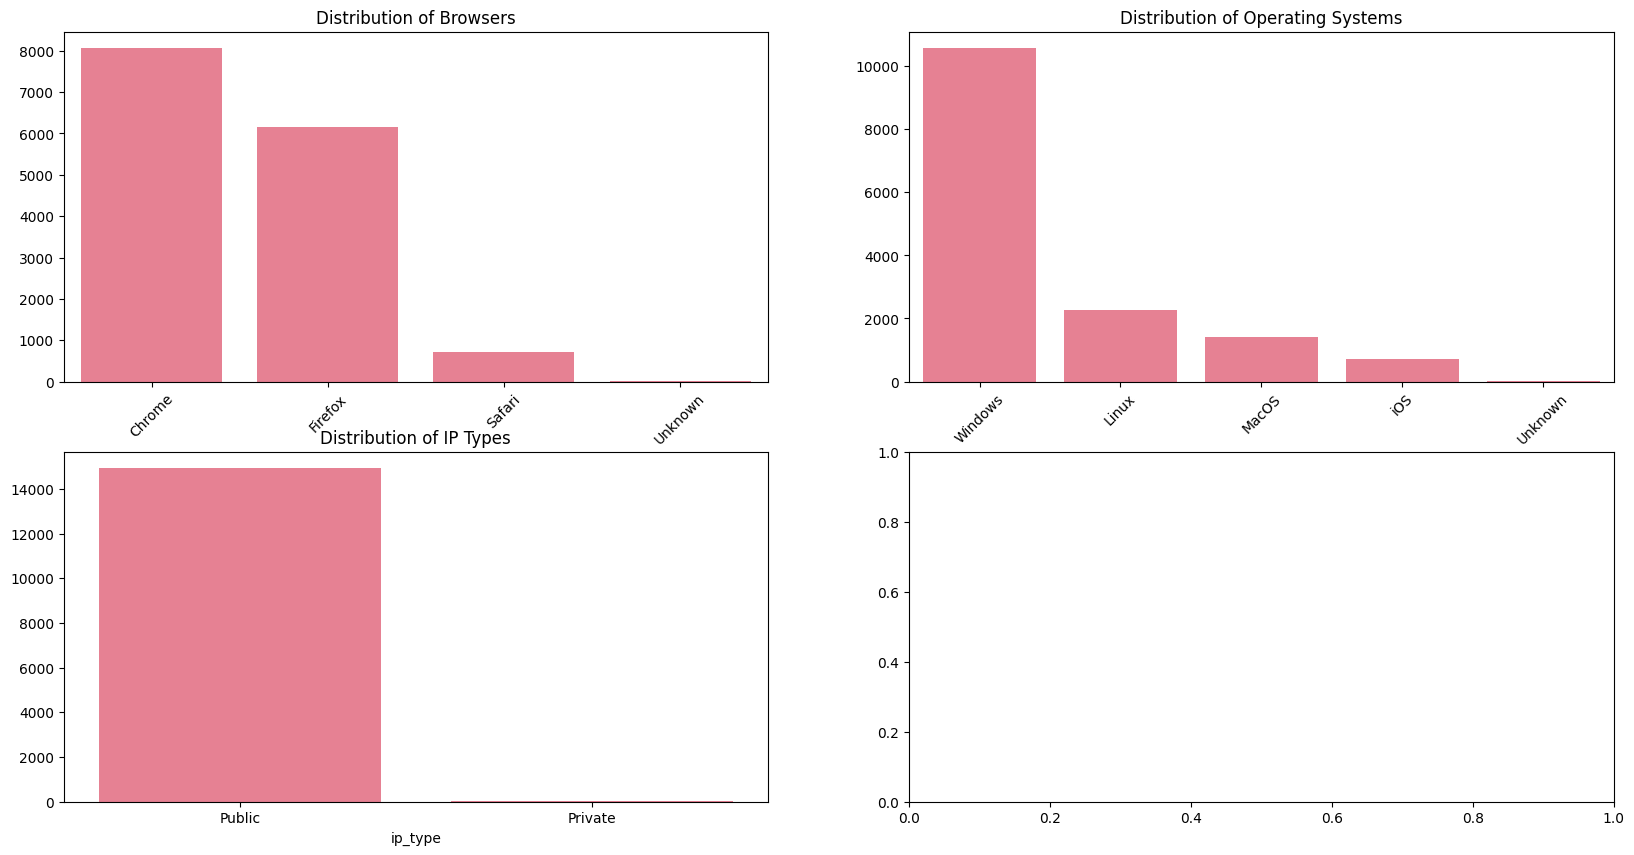

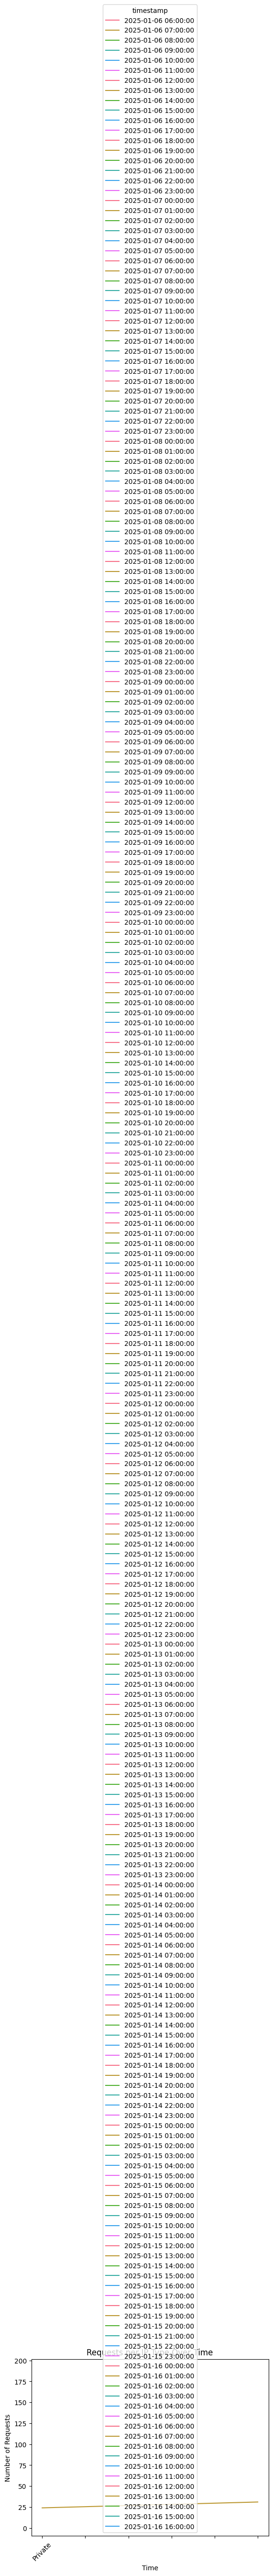


Summary of User Agent Analysis:

Top 10 User Agents:
user_agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36           4435
Mozilla/5.0 (Windows NT 11.0; Win64; x64; rv:131.0) Gecko/20100101 Firefox/131.0                                          1615
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:129.0) Gecko/20100101 Firefox/129.0                                          1574
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0                                          1510
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36                      430
Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36       418
Mozilla/5.0 (Windows NT 10.0; WOW64; rv:128.0) Gecko/20100101 Firefox/128.0                                                414
Mozilla/5.0 (Linux; Android 13; SM-G990B) Appl

In [8]:
# Analyze User Agents
def analyze_user_agents(df):
    # Extract browser and OS information
    def extract_browser_info(ua):
        browser = "Unknown"
        os = "Unknown"
        if pd.isna(ua):
            return browser, os
        
        if "Chrome" in ua:
            browser = "Chrome"
        elif "Firefox" in ua:
            browser = "Firefox"
        elif "Safari" in ua and "Chrome" not in ua:
            browser = "Safari"
        elif "MSIE" in ua or "Trident" in ua:
            browser = "Internet Explorer"
        
        if "Windows" in ua:
            os = "Windows"
        elif "Macintosh" in ua:
            os = "MacOS"
        elif "Linux" in ua:
            os = "Linux"
        elif "Android" in ua:
            os = "Android"
        elif "iPhone" in ua or "iPad" in ua:
            os = "iOS"
            
        return browser, os

    # Apply the extraction to create new columns
    df[['browser', 'os']] = pd.DataFrame(
        df['user_agent'].apply(extract_browser_info).tolist(), 
        index=df.index
    )
    
    return df

# Analyze IP addresses for potential geographic patterns
def analyze_ip_patterns(df):
    def categorize_ip(ip):
        try:
            ip_obj = ipaddress.ip_address(ip)
            if ip_obj.is_private:
                return 'Private'
            elif ip_obj.is_global:
                return 'Public'
            else:
                return 'Special'
        except ValueError:
            return 'Invalid'
    
    df['ip_type'] = df['ip'].apply(categorize_ip)
    return df

# Apply the analyses
df = analyze_user_agents(df)
df = analyze_ip_patterns(df)

# Create visualizations
plt.figure(figsize=(20, 10))

# 1. Browser Distribution
plt.subplot(2, 2, 1)
browser_counts = df['browser'].value_counts()
sns.barplot(x=browser_counts.index, y=browser_counts.values)
plt.title('Distribution of Browsers')
plt.xticks(rotation=45)

# 2. OS Distribution
plt.subplot(2, 2, 2)
os_counts = df['os'].value_counts()
sns.barplot(x=os_counts.index, y=os_counts.values)
plt.title('Distribution of Operating Systems')
plt.xticks(rotation=45)

# 3. IP Type Distribution
plt.subplot(2, 2, 3)
ip_type_counts = df['ip_type'].value_counts()
sns.barplot(x=ip_type_counts.index, y=ip_type_counts.values)
plt.title('Distribution of IP Types')

# 4. Requests per IP Type Over Time
plt.subplot(2, 2, 4)
df.set_index('timestamp').groupby('ip_type').resample('1H').size().unstack().plot()
plt.title('Requests per IP Type Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of User Agent Analysis:")
print("\nTop 10 User Agents:")
print(df['user_agent'].value_counts().head(10))

print("\nBrowser Distribution:")
print(df['browser'].value_counts(normalize=True) * 100)

print("\nOS Distribution:")
print(df['os'].value_counts(normalize=True) * 100)

print("\nIP Type Distribution:")
print(df['ip_type'].value_counts(normalize=True) * 100)

In [ ]:
# Generate summary report
def generate_summary_report(df, suspicious_patterns):
    print("=== Security Analysis Summary Report ===\n")
    
    # 1. General Statistics
    print("General Statistics:")
    print(f"Total number of requests: {len(df)}")
    print(f"Time period: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"Number of unique IPs: {df['ip'].nunique()}")
    print(f"Number of unique paths: {df['path'].nunique()}")
    
    # 2. Suspicious Activity Summary
    print("\nSuspicious Activity Detection:")
    print(f"- Rapid request incidents: {len(suspicious_patterns['rapid_requests'])}")
    print(f"- Failed login attempts: {len(suspicious_patterns['login_attempts'])}")
    print(f"- Suspicious payloads: {len(suspicious_patterns['suspicious_payloads'])}")
    print(f"- Unusual paths accessed: {len(suspicious_patterns['unusual_paths'])}")
    
    # 3. Top Security Concerns
    print("\nTop Security Concerns:")
    
    # Identify IPs with multiple types of suspicious activity
    suspicious_ips = set()
    for pattern_type, pattern_df in suspicious_patterns.items():
        if not pattern_df.empty:
            suspicious_ips.update(pattern_df['ip'].unique())
    
    if suspicious_ips:
        print("\nIPs showing suspicious behavior:")
        for ip in suspicious_ips:
            print(f"\nIP: {ip}")
            print(f"Total requests: {len(df[df['ip'] == ip])}")
            print("Activities:")
            if ip in suspicious_patterns['rapid_requests'].index:
                print("- Shows rapid request patterns")
            if ip in suspicious_patterns['login_attempts']['ip'].values:
                print("- Multiple failed login attempts")
            if ip in suspicious_patterns['suspicious_payloads']['ip'].values:
                print("- Suspicious payload attempts")
            if ip in suspicious_patterns['unusual_paths']['ip'].values:
                print("- Accessing unusual paths")
    
    # 4. Recommendations
    print("\nRecommendations:")
    recommendations = [
        "1. Implement rate limiting for all IPs showing rapid request patterns",
        "2. Set up progressive delays for failed login attempts",
        "3. Implement WAF rules to block suspicious payload patterns",
        "4. Monitor and block IPs with consistent suspicious behavior",
        "5. Review and strengthen input validation for all user inputs",
        "6. Implement CAPTCHA for login attempts after multiple failures",
        "7. Regular security audits of application endpoints",
        "8. Enhanced logging for suspicious paths and payloads"
    ]
    
    for rec in recommendations:
        print(rec)
    
    # 5. Traffic Patterns
    print("\nTraffic Pattern Analysis:")
    hour